# Initial data scrap and cleaning

#### Import necessary modules

In [1]:
import os
import numpy as np
import pandas as pd

from api_requests import get_rank, get_matches
from remove_statistical_outliers import remove_stat_outliers
from composite_stats import composite_player_stats
from combine_and_expand_match_data import combine_match_dfs
from graphs import plot_rank_distribution

### Make folder paths for data (and potentially a new subfolder)

In [2]:
def make_folder(folder):
    ## Check whether the specified path exists or not
    isExist = os.path.exists(folder)
    
    if not isExist:
        ## Create a new directory because it does not exist 
        os.makedirs(folder)
        print(f"The new directory, {folder}, was created!")

In [3]:
data_path = f'data/'
#u_list = f'{data_path}lists/'
plot_path = f'plots/'

make_folder(data_path)
make_folder(plot_path)

### Collect more users

In [6]:
initial_set={
        'me' : ('beta4days', 'dogw'),
        'iron' : ('SEN Kyu', '9771'),
        'bronze' : ('alam2881', 'NA111'),
        'silver' : ('milk green tea', 'boba'),
        'gold' : ('Tomato Taco', '5111'),
        'platinum' : ('Symperion', '4KT'),
        'diamond' : ('Kisuke', 'zzz'),
        'immortal' : ('Toph', '00001'),
        'radiant' : ('BabyJ', 'Halo'),
}

depth = 0

### Find ranks for pre-existing lists of accounts

In [38]:
# compile usernames list into one dataframe
files = [file for file in os.listdir(u_list) 
         if os.path.isfile(os.path.join(u_list, file))]

accounts = pd.DataFrame()

for file in files:
    accounts = pd.concat(
        [accounts, pd.read_csv(f'{u_list}{file}')])
    
accounts.columns = ['User', 'Tag']

accounts = accounts.reset_index(drop=True)

In [39]:
accounts.tail(5)

,User,Tag
274977,DawnKeeeBalls,SLEEP
274978,tde,1234
274979,shogaN,LOVE
274980,FlyingPotato88,8844
274981,ChickenTheLord,Dumbr


In [29]:
accounts_split = np.array_split(accounts, 1000) 

for i in range(0, len(accounts_split)):
    df = accounts_split[i]
    
    df['Rank'] = df.apply(
        lambda row: get_rank(row.User, row.Tag), 
        axis=1)
    
    df.to_csv(f'{rank_path}total_list_{i+1}.csv', index=False)

#### Combine lists with ranks and drop the accounts with empty ranks

In [47]:
rank_df = pd.DataFrame()

files = [file for file in os.listdir(rank_path) 
         if os.path.isfile(os.path.join(rank_path, file))]

for file in files:
    new_df = pd.read_csv(f'{rank_path}{file}')
    new_df = new_df.dropna(how='any')
    rank_df = pd.concat([rank_df, new_df])
    
rank_df = rank_df.drop_duplicates(subset=['User', 'Tag'], keep='last')
rank_df = rank_df.reset_index(drop=True)

rank_df.to_csv(f'{data_path}rank_total_list.csv', index=False)

print(len(rank_df.index))
rank_df.tail(5)

153966


,User,Tag,Rank
153961,LonelyBagel,Mochi,Gold 1
153962,bagel,001,Immortal 1
153963,Blazin,pog,Diamond 1
153964,Little Bingster,NA1,Ascendant 1
153965,Counterparts,drunk,Ascendant 2


#### Plots current rank distribution

In [4]:
rank_df = pd.read_csv(f'{data_path}rank_total_list.csv')

rank_df.tail(5)

,User,Tag,Rank
153961,LonelyBagel,Mochi,Gold 1
153962,bagel,001,Immortal 1
153963,Blazin,pog,Diamond 1
153964,Little Bingster,NA1,Ascendant 1
153965,Counterparts,drunk,Ascendant 2


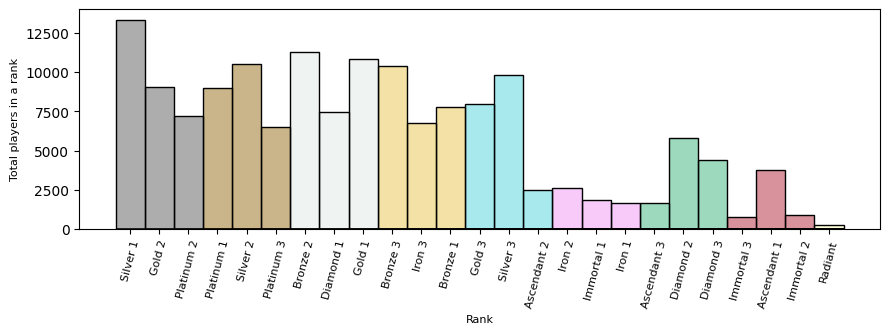

In [5]:
plot_rank_distribution(rank_df, plot_path, 'rank')

### Collect and filter match data

In [ ]:
rank_df = pd.read_csv(f'{data_path}rank_total_list.csv')

rank_df_split = np.array_split(rank_df, 1000) 

for i in range(0, len(rank_df_split)):
    df = rank_df_split[i]
    df['Matches'] = df.apply(
        lambda r: get_matches(r.User, r.Tag, 'competitive'), 
        axis=1)

    # save each df
    df.to_csv(f'{match_path}total_list_{i+1}.csv', index=False)

#### Combine lists with match data and drop the accounts with empty ranks

In [ ]:
match_df = combine_match_dfs(data_path, match_path)

match_df.tail(5)

#### Plots current rank distribution

In [ ]:
match_df = pd.read_csv(f'{data_path}match_total_list.csv')

df = composite_player_stats(match_df)

In [5]:
# Remove statistical outliers from each rank
df = remove_stat_outliers(df, data_path)

df.tail()

,User,Tag,Rank,level,Position,avg_spent,avg_loadout,HS_perc,KD,avg_assists,avg_ability_usage,avg_score,avg_dmg_made,avg_dmg_rec
432264,justinovah,000,Radiant,436.0,Initiator,2923.0,4073.0,30.188679,0.833333,0.187500,1.968750,175.593750,120.156250,134.218750
432265,justinovah,000,Radiant,436.0,Initiator,2558.0,3167.0,18.518519,0.666667,0.444444,2.222222,179.611111,104.722222,161.833333
432266,justinovah,000,Radiant,436.0,Initiator,2487.0,3969.0,36.666667,0.647059,0.461538,2.615385,134.153846,87.192308,122.038462
432267,Lelouch,Japan,Radiant,294.0,Duelist,2192.0,4144.0,19.354839,1.588235,0.192308,2.192308,284.615385,192.730769,128.000000
432268,Lelouch,Japan,Radiant,294.0,Duelist,1966.0,3903.0,20.454545,1.923077,0.157895,2.315789,366.052632,217.526316,122.000000


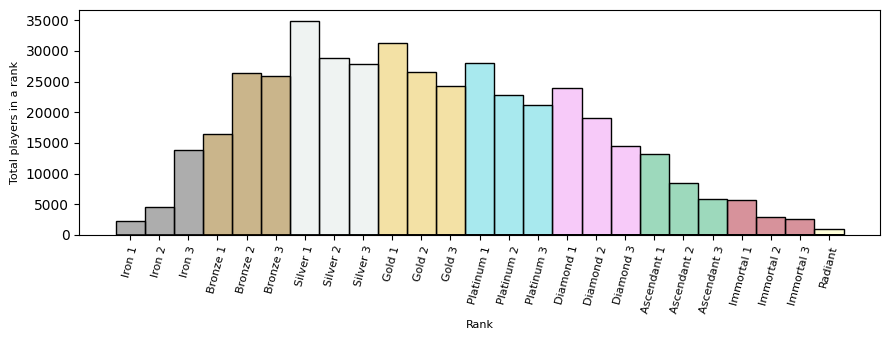

In [7]:
plot_rank_distribution(df, plot_path, 'clean')

# fairly similiar to distribution found in https://tracker.gg/valorant/leaderboards/ranked/all/default?page=1

In [6]:
df = pd.read_csv(f'{data_path}cleaned_total_list.csv')